In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('Sales_Data.xlsx')
df.shape

(2747, 20)

In [3]:
# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

None

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
# Summary statistics
display(df.describe())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042548,4.230544,1838.953901,NaN,819.280576,40.114802


In [5]:
# Checking for missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

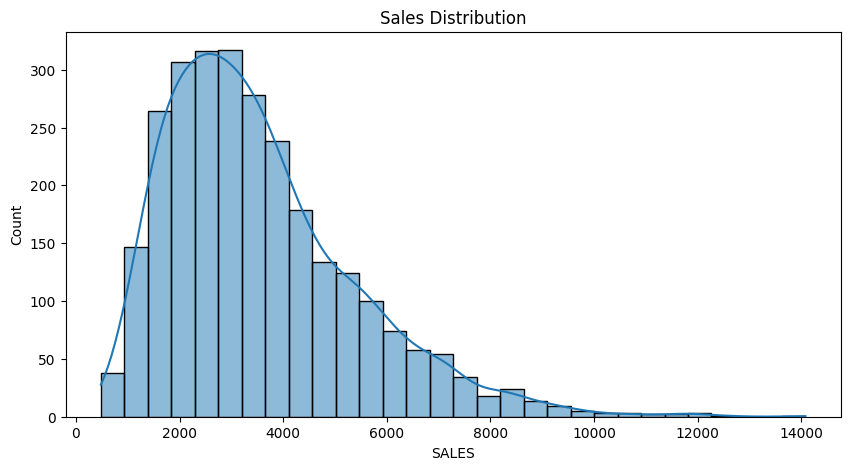

In [6]:
# Univariate Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

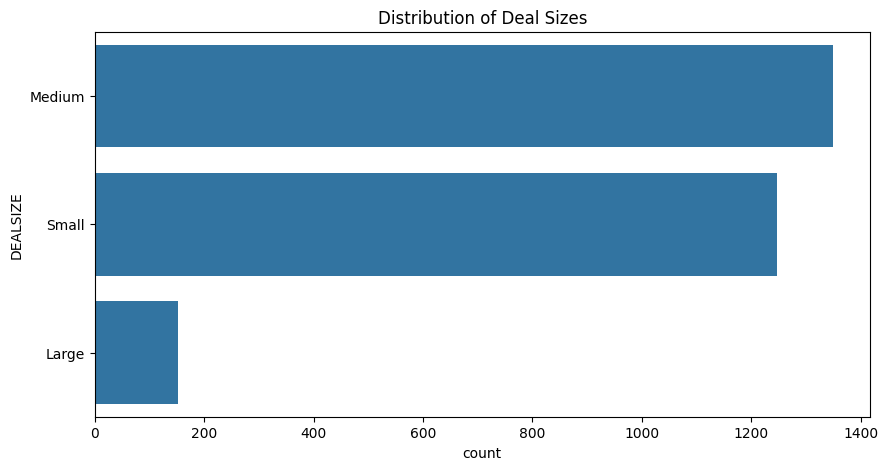

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['DEALSIZE'], order=df['DEALSIZE'].value_counts().index)
plt.title('Distribution of Deal Sizes')
plt.show()

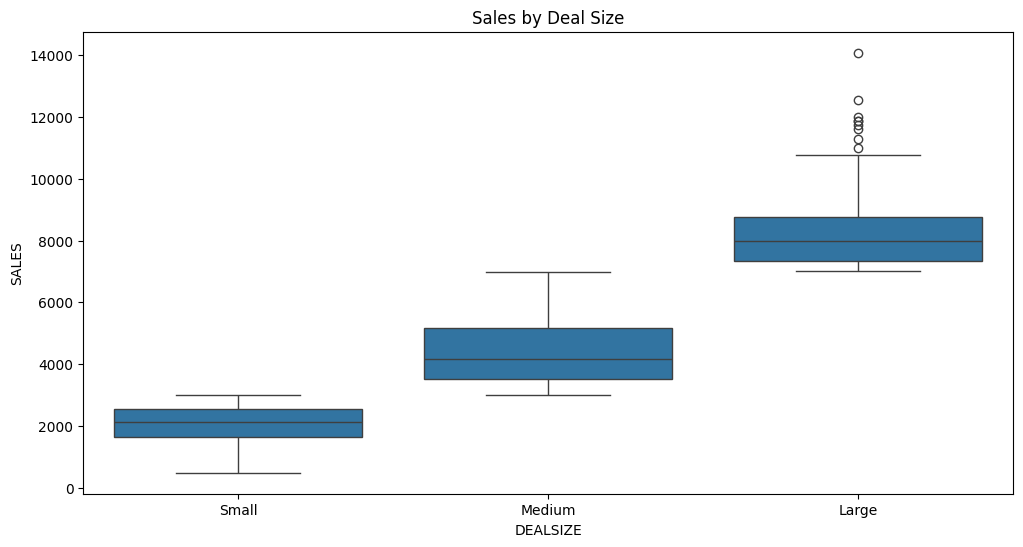

In [8]:
# Bivariate Analysis
plt.figure(figsize=(12,6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales by Deal Size')
plt.show()

C:\Users\agnes\AppData\Local\Temp\ipykernel_22748\3855660172.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["ORDERDATE"], y=df["SALES"], estimator="sum", ci=None)


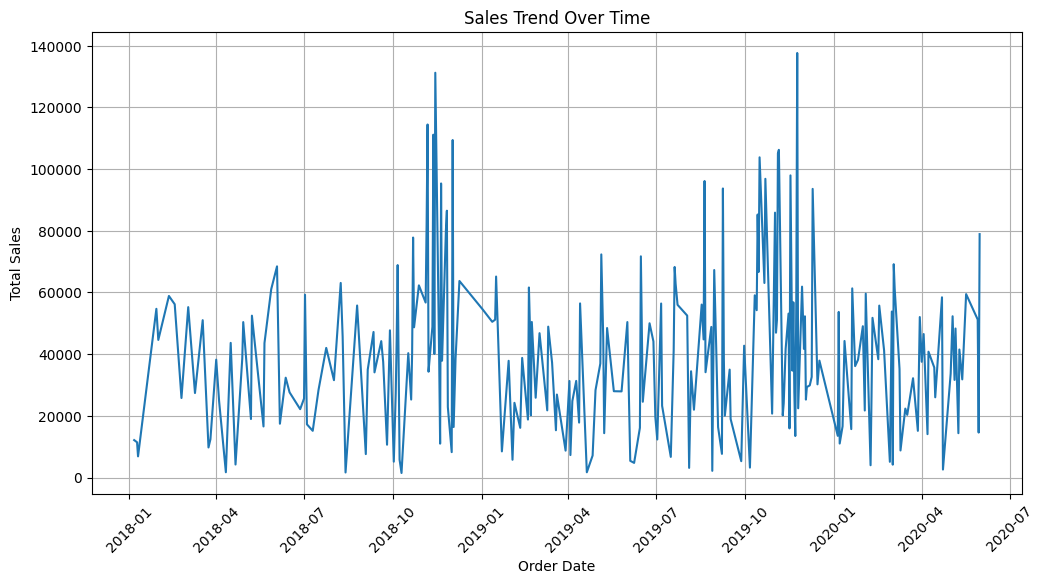

In [9]:
# Convert ORDERDATE to datetime (if not already converted)
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot sales trend over time
sns.lineplot(x=df["ORDERDATE"], y=df["SALES"], estimator="sum", ci=None)
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\agnes\AppData\Local\Temp\ipykernel_22748\3774382.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="SALES", y="PRODUCTLINE", data=df, estimator=sum, ci=None)


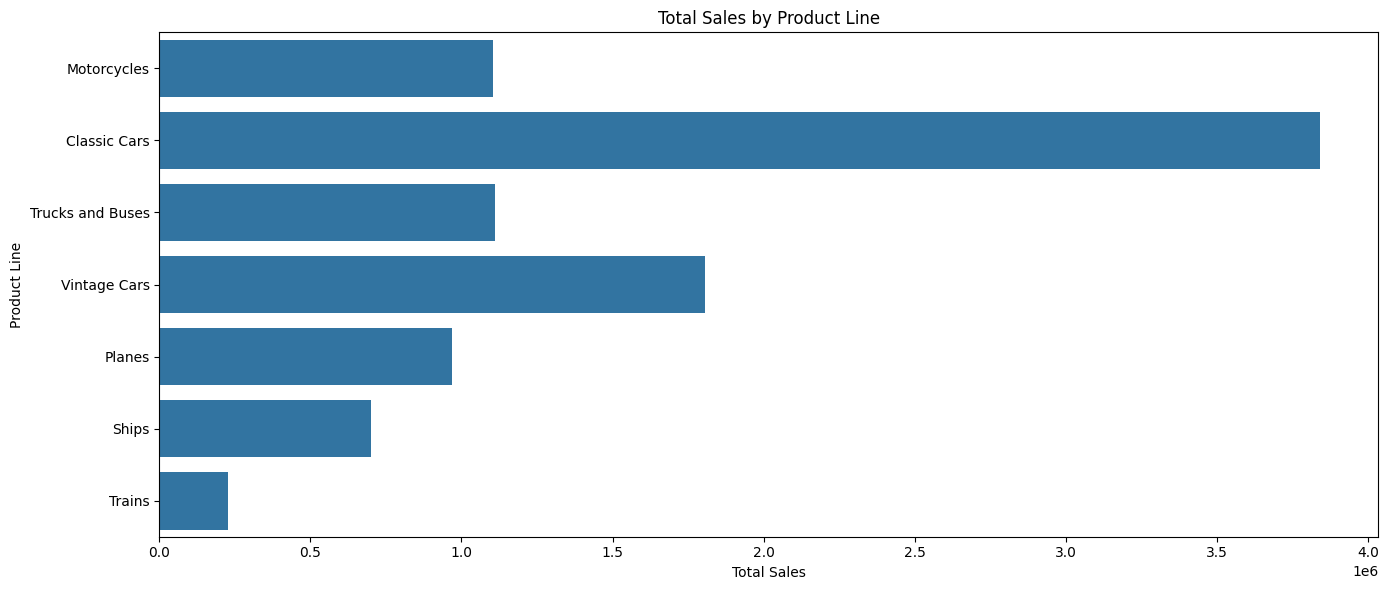

In [10]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Sales by Product Line
sns.barplot(x="SALES", y="PRODUCTLINE", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

C:\Users\agnes\AppData\Local\Temp\ipykernel_22748\3541847354.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="SALES", data=df, estimator="sum", ci=None, ax=axes[0, 0])
C:\Users\agnes\AppData\Local\Temp\ipykernel_22748\3541847354.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Month", y="SALES", data=df, estimator="sum", ci=None, ax=axes[0, 1])
C:\Users\agnes\AppData\Local\Temp\ipykernel_22748\3541847354.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Quarter", y="SALES", data=df, estimator=sum, ci=None, ax=axes[1, 0])
C:\Users\agnes\AppData\Local\Temp\ipykernel_22748\3541847354.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Week", y="SALES", data=df, estimator=sum, ci=None, ax=axes[1, 1])
C:\Users\agnes

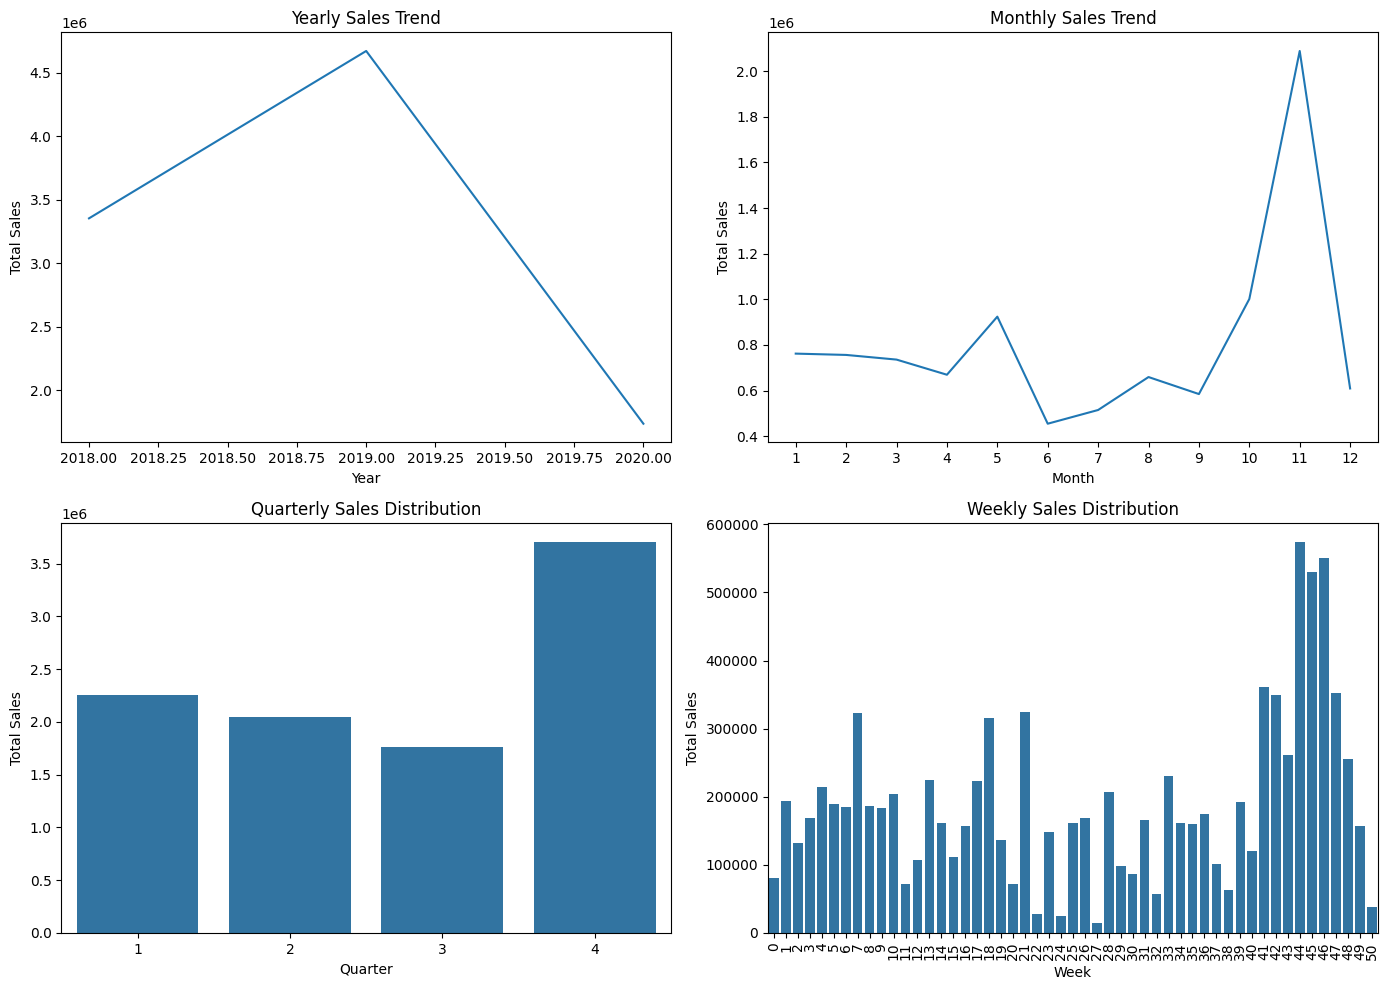

In [11]:
# Extracting Year, Month, Quarter, and Week
df["Year"] = df["ORDERDATE"].dt.year  # Corrected Year extraction
df["Month"] = df["ORDERDATE"].dt.month
df["Quarter"] = df["ORDERDATE"].dt.quarter
df["Week"] = df["ORDERDATE"].dt.isocalendar().week  # Corrected Week extraction

# Set up the figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Changed to 2x2 for better layout

# Yearly Sales Trend
sns.lineplot(x="Year", y="SALES", data=df, estimator="sum", ci=None, ax=axes[0, 0])
axes[0, 0].set_title("Yearly Sales Trend")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Total Sales")

# Monthly Sales Trend
sns.lineplot(x="Month", y="SALES", data=df, estimator="sum", ci=None, ax=axes[0, 1])
axes[0, 1].set_title("Monthly Sales Trend")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Total Sales")
axes[0, 1].set_xticks(range(1, 13))

# Quarterly Sales Trend
sns.barplot(x="Quarter", y="SALES", data=df, estimator=sum, ci=None, ax=axes[1, 0])
axes[1, 0].set_title("Quarterly Sales Distribution")
axes[1, 0].set_xlabel("Quarter")
axes[1, 0].set_ylabel("Total Sales")

# Weekly Sales Trend
sns.barplot(x="Week", y="SALES", data=df, estimator=sum, ci=None, ax=axes[1, 1])
axes[1, 1].set_title("Weekly Sales Distribution")
axes[1, 1].set_xlabel("Week")
axes[1, 1].set_ylabel("Total Sales")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticks(), rotation=90)  # Rotate week labels for better readability

plt.tight_layout()
plt.show()

In [12]:
# Time-Series Analysis
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['SALES'].sum()

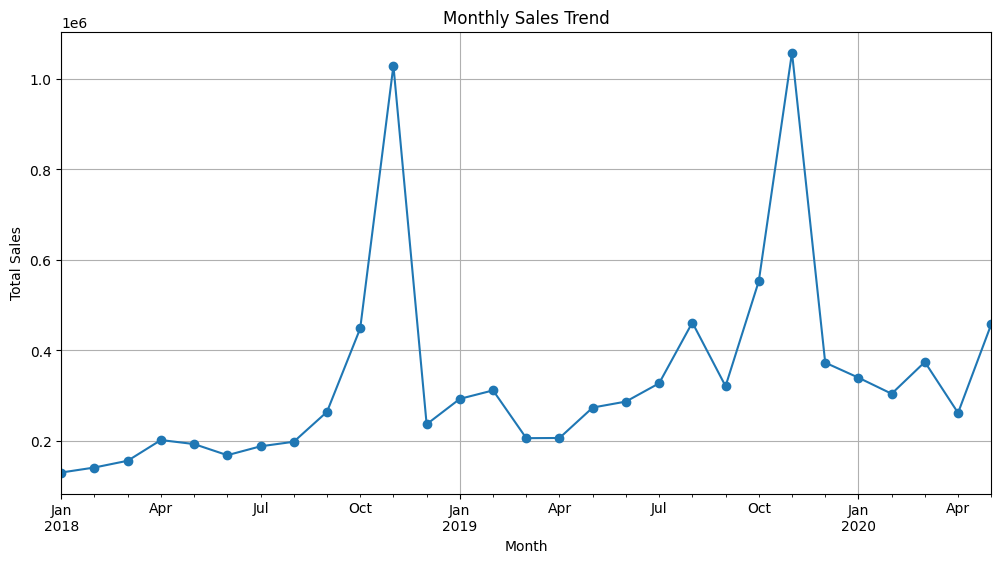

In [13]:
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

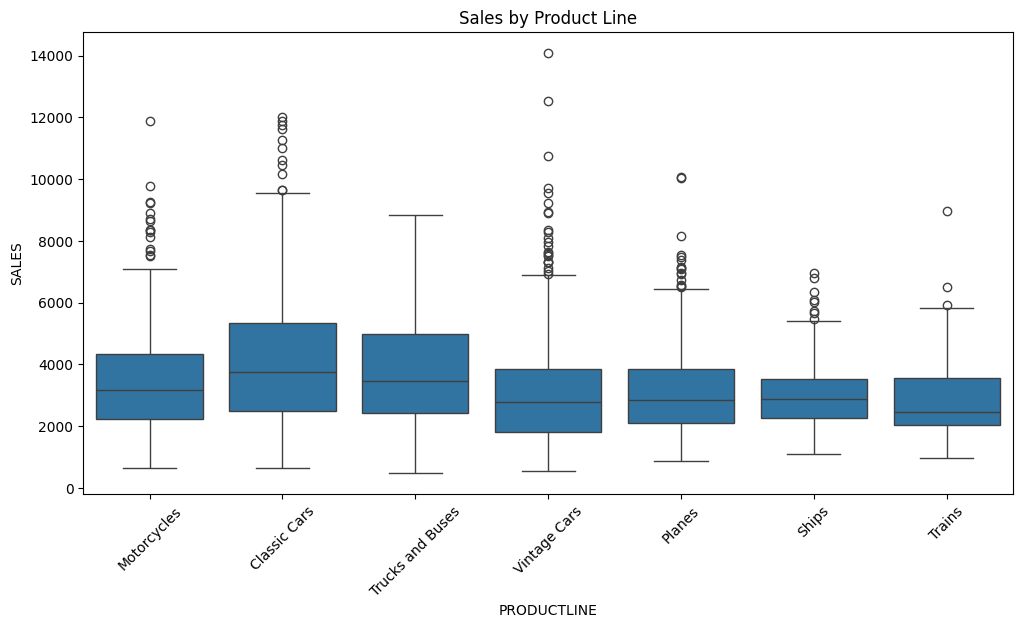

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.xticks(rotation=45)
plt.title('Sales by Product Line')
plt.show()

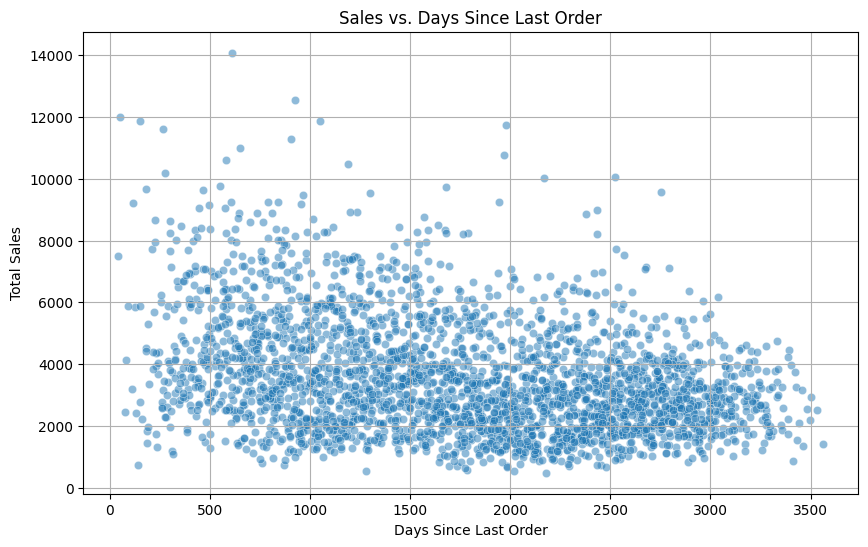

In [15]:
# Scatter plot to analyze Sales vs. Days Since Last Order
plt.figure(figsize=(10, 6))
sns.scatterplot(x="DAYS_SINCE_LASTORDER", y="SALES", data=df, alpha=0.5)
plt.xlabel("Days Since Last Order")
plt.ylabel("Total Sales")
plt.title("Sales vs. Days Since Last Order")
plt.grid(True)
plt.show()

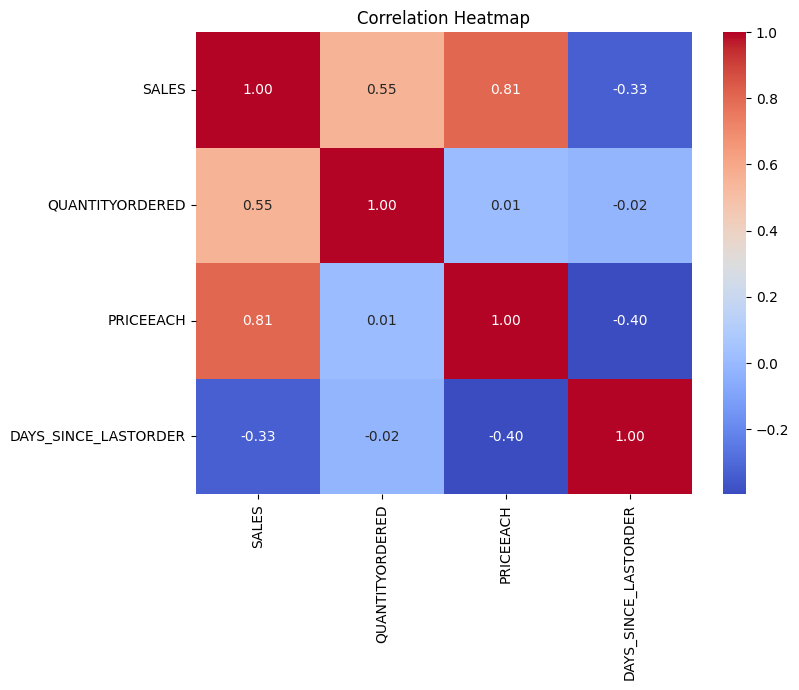

In [16]:
# Multivariate Analysis
corr_matrix = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'DAYS_SINCE_LASTORDER']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

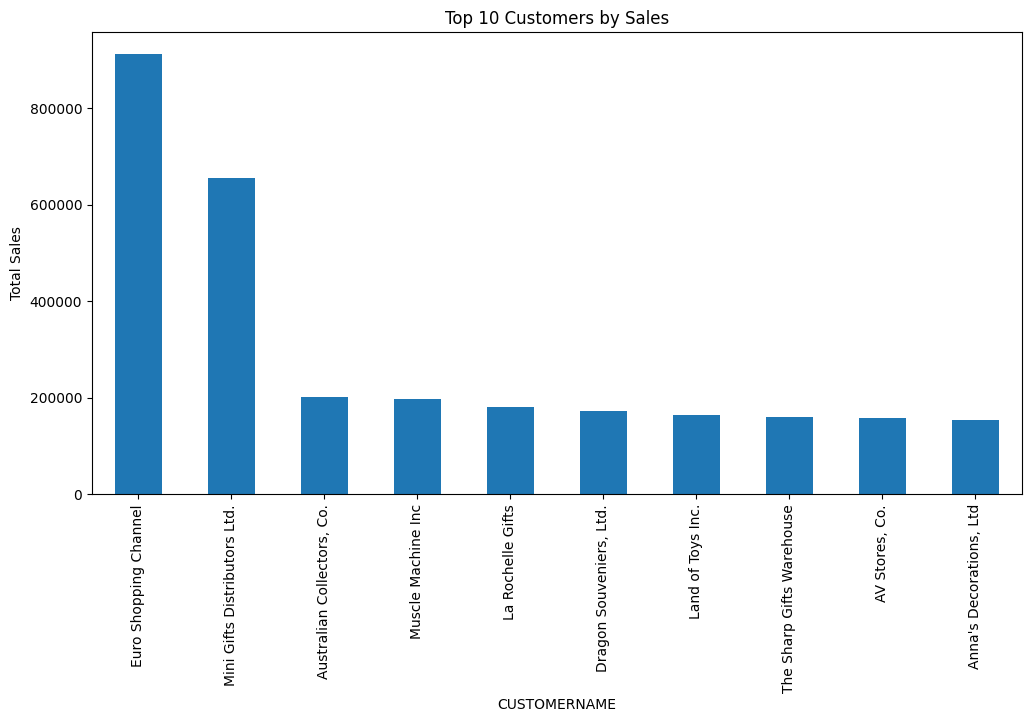

In [17]:
# Top customers by sales
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

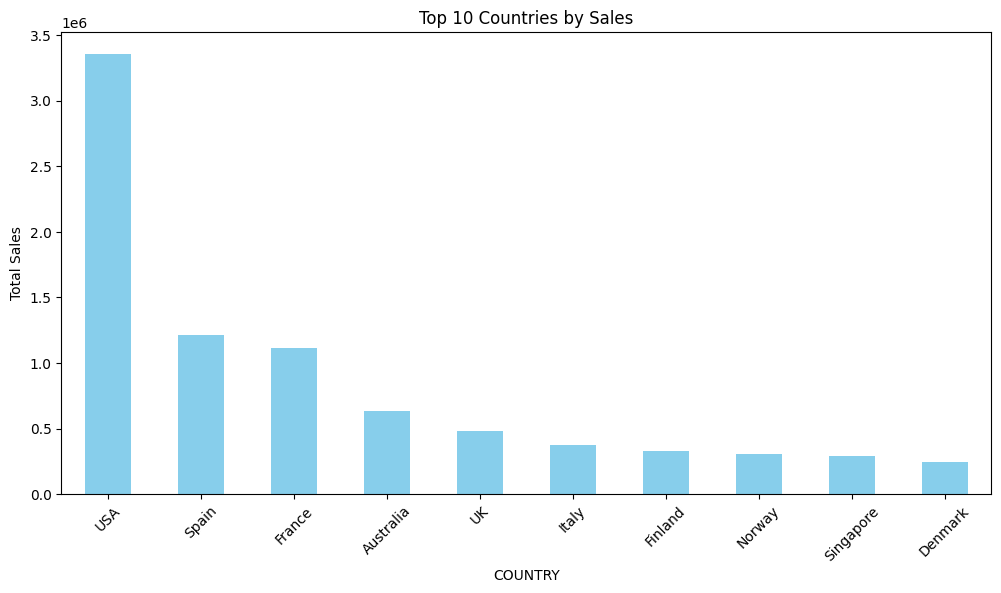

In [18]:
# Geographical Analysis
top_countries = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Save cleaned data for segmentation analysis
df.to_csv("cleaned_customer_transactions.csv", index=False)

In [20]:
# Compute Recency, Frequency, and Monetary metrics

# Aggregate data at the customer level
rfm_df = df.groupby("CUSTOMERNAME").agg(
    Recency=("DAYS_SINCE_LASTORDER", "min"),  
    Frequency=("ORDERNUMBER", "nunique"),  
    Monetary=("SALES", "sum") 
).reset_index()

# Handle missing values (if any)
rfm_df["Recency"].fillna(999, inplace=True)  # Assign a large number to missing values

# Display the first few rows of the RFM dataset
print(rfm_df.head())


              CUSTOMERNAME  Recency  Frequency   Monetary
0           AV Stores, Co.      421          3  157807.81
1             Alpha Cognac      675          3   70488.44
2       Amica Models & Co.      328          2   94117.26
3  Anna's Decorations, Ltd      131          4  153996.13
4        Atelier graphique      312          3   24179.96


In [21]:
# Use rank-based binning to avoid duplicate bin edges issue
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"].rank(method="first"), 5, labels=[5, 4, 3, 2, 1])
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Convert scores to integer type
rfm_df["RFM_Score"] = rfm_df[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

# Display first few rows
rfm_df.head()

,CUSTOMERNAME,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,"AV Stores, Co.",421,3,157807.81,3,2,5,10
1,Alpha Cognac,675,3,70488.44,1,2,2,5
2,Amica Models & Co.,328,2,94117.26,4,1,3,8
3,"Anna's Decorations, Ltd",131,4,153996.13,5,4,5,14
4,Atelier graphique,312,3,24179.96,4,2,1,7


In [22]:
# Define customer segments based on RFM Score thresholds
def assign_segment(score):
    if score >= 12:
        return "Best customers"
    elif score >= 9:
        return "Loyal Customers"
    elif score >= 6:
        return "Customers on the verge of churning"
    else:
        return "Lost Customers"

rfm_df["Segment"] = rfm_df["RFM_Score"].apply(assign_segment)

# Display first few rows with segments
rfm_df.head()

,CUSTOMERNAME,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,"AV Stores, Co.",421,3,157807.81,3,2,5,10,Loyal Customers
1,Alpha Cognac,675,3,70488.44,1,2,2,5,Lost Customers
2,Amica Models & Co.,328,2,94117.26,4,1,3,8,Customers on the verge of churning
3,"Anna's Decorations, Ltd",131,4,153996.13,5,4,5,14,Best customers
4,Atelier graphique,312,3,24179.96,4,2,1,7,Customers on the verge of churning


In [23]:
# Count of customers in each segment
segment_counts = rfm_df["Segment"].value_counts()

# Summary statistics for each segment
segment_summary = rfm_df.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()

# Display results
segment_counts, segment_summary

(Segment
 Loyal Customers                       24
 Best customers                        24
 Customers on the verge of churning    23
 Lost Customers                        18
 Name: count, dtype: int64,
                                        Recency  Frequency       Monetary
 Segment                                                                 
 Best customers                      253.166667   5.333333  194751.742917
 Customers on the verge of churning  478.260870   2.521739   75334.868261
 Lost Customers                      730.277778   2.222222   49896.111667
 Loyal Customers                     411.958333   3.000000  102306.162500)

In [24]:
# Display a sample of the final output (5-10 rows)
rfm_df.sample(10)

,CUSTOMERNAME,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
42,"La Corne D'abondance, Co.",387,3,97203.68,3,3,3,9,Loyal Customers
24,Cruz & Sons Co.,971,3,94015.73,1,3,3,7,Customers on the verge of churning
69,Scandinavian Gift Ideas,262,3,134259.33,4,4,5,13,Best customers
82,Toys4GrownUps.com,649,3,104561.96,2,4,4,10,Loyal Customers
79,"Tokyo Collectables, Ltd",259,4,120562.74,4,5,4,13,Best customers
27,Diecast Classics Inc.,228,4,122138.14,5,5,4,14,Best customers
13,"Blauer See Auto, Co.",705,4,85171.59,1,4,3,8,Customers on the verge of churning
73,"Stylish Desk Decors, Co.",702,3,88804.50,1,4,3,8,Customers on the verge of churning
59,Osaka Souveniers Co.,563,2,67605.07,2,2,2,6,Customers on the verge of churning
10,Auto-Moto Classics Inc.,1353,3,26479.26,1,2,1,4,Lost Customers
